## 201822037 통계학과 한민주

In [1]:
#패키지 부착
library(ISLR2)

## Boston data

In [2]:
#Boston 데이터셋
Boston<-Boston

#medv가 20이상이면 1(high), 20미만이면 0(low)
medv1=ifelse(Boston[,'medv']>=20,1,0)
Boston['medv1']=medv1
Boston<-Boston[,-13]
Boston["medv1"]=as.factor(Boston$medv1)

In [3]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv1
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,1
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,1
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,1
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,1
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,1
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,1


## 로지스틱 회귀모형

In [4]:
set.seed(9876)
# idx 설정 (6 : 4) 
idx <- sample(x = c("train", "test"), size = nrow(Boston), 
              replace = TRUE, prob = c(6, 4))

In [5]:
# idx에 따라 훈련/검정 자료 나누기 
train <- Boston[idx == "train", ] 
test <- Boston[idx == "test", ]

# test 데이터 설명변수/반응변수 나누기 
test_x <- test[, -13] 
test_y <- test[, 13]

In [6]:
# 로지스틱 회귀분석 모델 생성 (full모델)
full <- glm(formula = medv1 ~ ., data = train, family = "binomial") 
summary(full)


Call:
glm(formula = medv1 ~ ., family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.47097  -0.24838   0.03584   0.26935   2.08979  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  16.552016   5.226316   3.167  0.00154 ** 
crim         -0.117998   0.092064  -1.282  0.19995    
zn            0.003442   0.021265   0.162  0.87141    
indus         0.125980   0.065588   1.921  0.05476 .  
chas          1.586298   0.895453   1.772  0.07648 .  
nox         -13.736424   4.179847  -3.286  0.00101 ** 
rm            1.515633   0.607680   2.494  0.01263 *  
age          -0.038666   0.015836  -2.442  0.01462 *  
dis          -0.865917   0.234356  -3.695  0.00022 ***
rad           0.228860   0.082155   2.786  0.00534 ** 
tax          -0.009602   0.004182  -2.296  0.02169 *  
ptratio      -0.303161   0.140187  -2.163  0.03058 *  
lstat        -0.412278   0.076988  -5.355 8.55e-08 ***
---
Signif. codes:  0 '*

#### crime과 zn변수가 유효하지 않고 , AIC 값은 168.69이다.

In [7]:
# full 모델 확률 예측
pre=predict(object = full, newdata = test_x, type = "response")
t=table(round(pre),test_y)
print(t)

   test_y
      0   1
  0  65  10
  1  19 104


In [8]:
#민감도
t[2,2]/(t[2,1]+t[2,2])

[1] 0.8455285

In [9]:
#특이도
t[1,1]/(t[1,1]+t[1,2])

[1] 0.8666667

In [10]:
#정분류율
(t[1,1]+t[2,2])/(t[1,1]+t[1,2]+t[2,1]+t[2,2])

[1] 0.8535354

In [11]:
# 로지스틱 회귀분석 모델 생성 ( stepwise 모델 )
step <- step(object = full, trace = F) 
summary(step)


Call:
glm(formula = medv1 ~ crim + indus + chas + nox + rm + age + 
    dis + rad + tax + ptratio + lstat, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4711  -0.2469   0.0376   0.2682   2.0933  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  16.522380   5.225472   3.162  0.00157 ** 
crim         -0.116780   0.091485  -1.277  0.20178    
indus         0.126342   0.065382   1.932  0.05332 .  
chas          1.590562   0.895156   1.777  0.07559 .  
nox         -13.752406   4.181203  -3.289  0.00101 ** 
rm            1.524606   0.604726   2.521  0.01170 *  
age          -0.038926   0.015759  -2.470  0.01351 *  
dis          -0.845329   0.195987  -4.313 1.61e-05 ***
rad           0.226591   0.080718   2.807  0.00500 ** 
tax          -0.009434   0.004037  -2.337  0.01944 *  
ptratio      -0.308964   0.135677  -2.277  0.02277 *  
lstat        -0.412184   0.076994  -5.353 8.63e-08 ***
---
Signif. c

#### crime과 zn 변수가 유효하지 않고, AIC값은 166.72 이다.

In [12]:
# stepwise 모델 확률 예측 
pre=predict(object = step, newdata = test_x, type = "response")
t=table(round(pre),test_y)
print(t)

   test_y
      0   1
  0  65  10
  1  19 104


In [13]:
#민감도
t[2,2]/(t[2,1]+t[2,2])

[1] 0.8455285

In [14]:
#특이도
t[1,1]/(t[1,1]+t[1,2])

[1] 0.8666667

In [15]:
#정분류율
(t[1,1]+t[2,2])/(t[1,1]+t[1,2]+t[2,1]+t[2,2])

[1] 0.8535354

#### full모델과 stepwise모델은 같은 test data에 대해서 민감도, 특이도, 정분류율은 같지만, AIC 측면에서 stepwise 모델이 조금 더 낫다

## 의사결정 나무

In [16]:
# 패키지 부착
library(rpart)
library(rpart.plot)

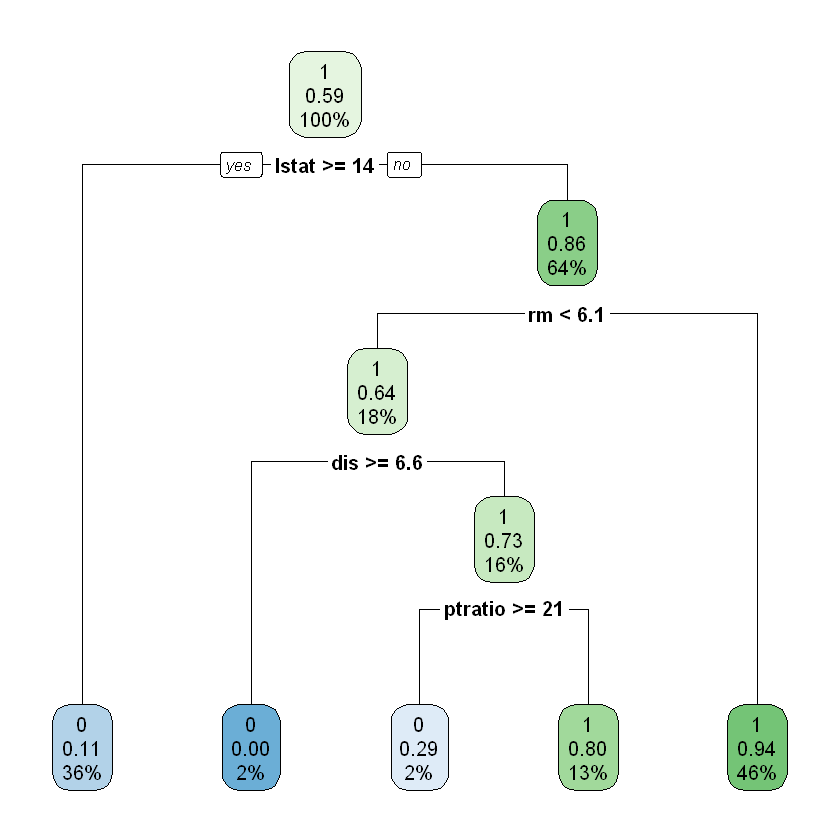

In [17]:
# 의사결정 나무 모형 적합
tree=rpart(medv1~. ,data=train,method="class")
rpart.plot(tree) # medv1의 분류에 4개의 예측변수가 사용되었다

In [18]:
summary(tree) #분기가 4번 일어남 , cp값이 작을수록 좋음

Call:
rpart(formula = medv1 ~ ., data = train, method = "class")
  n= 308 

          CP nsplit rel error    xerror       xstd
1 0.68253968      0 1.0000000 1.0000000 0.06848178
2 0.02777778      1 0.3174603 0.3571429 0.04919696
3 0.02380952      3 0.2619048 0.3412698 0.04827377
4 0.01000000      4 0.2380952 0.3730159 0.05008680

Variable importance
  lstat     age   indus     tax    crim     nox      rm     dis      zn ptratio 
     28      14      13      12      12      12       3       2       2       1 

Node number 1: 308 observations,    complexity param=0.6825397
  predicted class=1  expected loss=0.4090909  P(node) =1
    class counts:   126   182
   probabilities: 0.409 0.591 
  left son=2 (110 obs) right son=3 (198 obs)
  Primary splits:
      lstat   < 14.4     to the right, improve=79.44646, (0 missing)
      age     < 76.25    to the right, improve=41.54493, (0 missing)
      nox     < 0.522    to the right, improve=39.60646, (0 missing)
      ptratio < 19.9     to the ri

In [19]:
printcp(tree)


Classification tree:
rpart(formula = medv1 ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] dis     lstat   ptratio rm     

Root node error: 126/308 = 0.40909

n= 308 

        CP nsplit rel error  xerror     xstd
1 0.682540      0   1.00000 1.00000 0.068482
2 0.027778      1   0.31746 0.35714 0.049197
3 0.023810      3   0.26190 0.34127 0.048274
4 0.010000      4   0.23810 0.37302 0.050087



Classification tree:
rpart(formula = medv1 ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] lstat

Root node error: 126/308 = 0.40909

n= 308 

       CP nsplit rel error  xerror     xstd
1 0.68254      0   1.00000 1.00000 0.068482
2 0.03000      1   0.31746 0.35714 0.049197


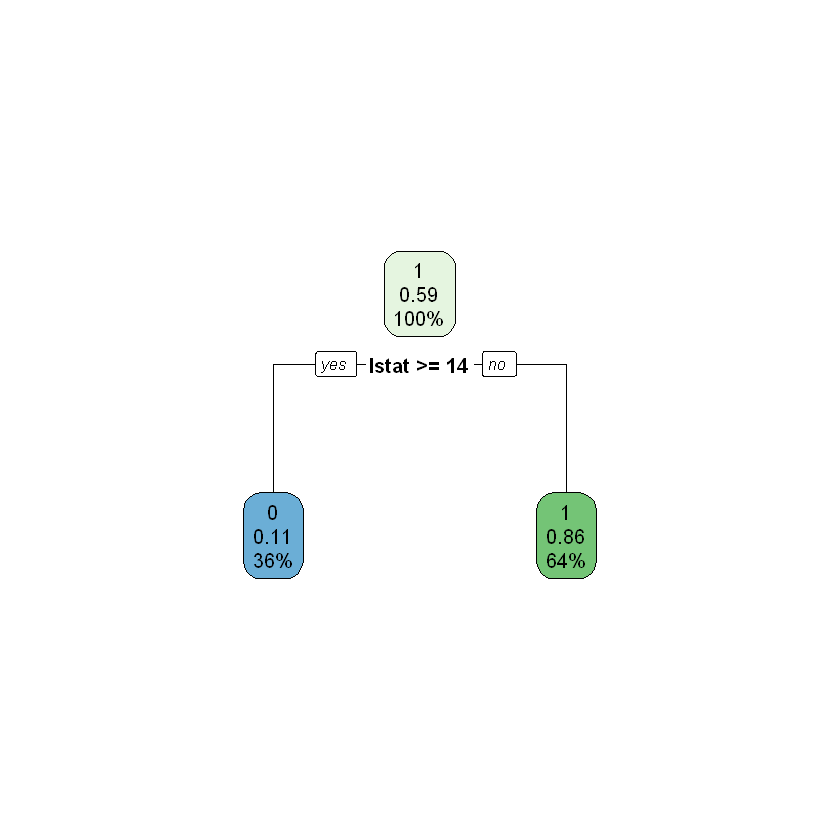

In [20]:
 #cp=0.03으로 가지치기기
pruned_tree=prune(tree,cp=0.03)
rpart.plot(pruned_tree)  #분기가 1번 일어남
printcp(pruned_tree) #cp값이 작을수록 좋음, medv1의 분류에 Istat 예측변수만 사용되었다.

In [21]:
#가지치기 전 나무모델 예측
pre=predict(tree,test_x,type="class")
t=table(pre,test_y)
print(t)

   test_y
pre   0   1
  0  64  13
  1  20 101


In [22]:
#민감도
t[2,2]/(t[2,1]+t[2,2])

[1] 0.8347107

In [23]:
#특이도
t[1,1]/(t[1,1]+t[1,2])

[1] 0.8311688

In [24]:
#정분류율
(t[1,1]+t[2,2])/(t[1,1]+t[1,2]+t[2,1]+t[2,2])

[1] 0.8333333

In [25]:
#가지치기 후 나무모델 예측
ppre=predict(pruned_tree,test_x,type="class")
t=table(ppre,test_y)
print(t)

    test_y
ppre   0   1
   0  59   9
   1  25 105


In [26]:
#민감도
t[2,2]/(t[2,1]+t[2,2])

[1] 0.8076923

In [27]:
#특이도
t[1,1]/(t[1,1]+t[1,2])

[1] 0.8676471

In [28]:
#정분류율
(t[1,1]+t[2,2])/(t[1,1]+t[1,2]+t[2,1]+t[2,2])

[1] 0.8282828

In [29]:
#혼동행렬 시각화
library(ggplot2)

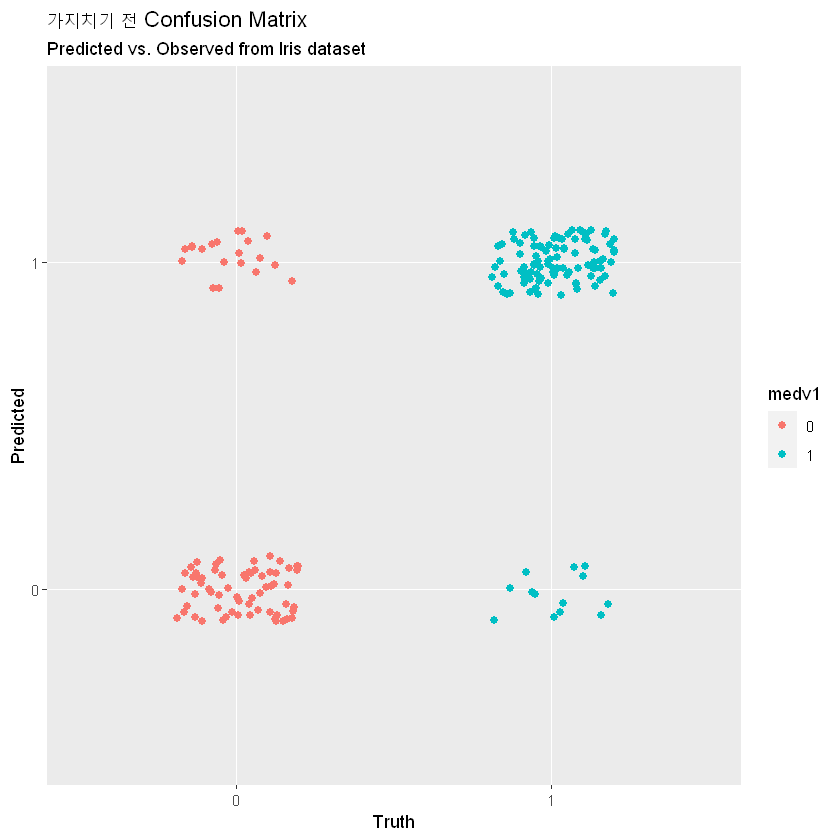

In [30]:
ggplot(test, aes(medv1, pre, color = medv1)) +
   geom_jitter(width = 0.2, height = 0.1, size=2) +
     labs(title="가지치기 전 Confusion Matrix", 
                 subtitle="Predicted vs. Observed from Iris dataset", 
               y="Predicted", 
                x="Truth")

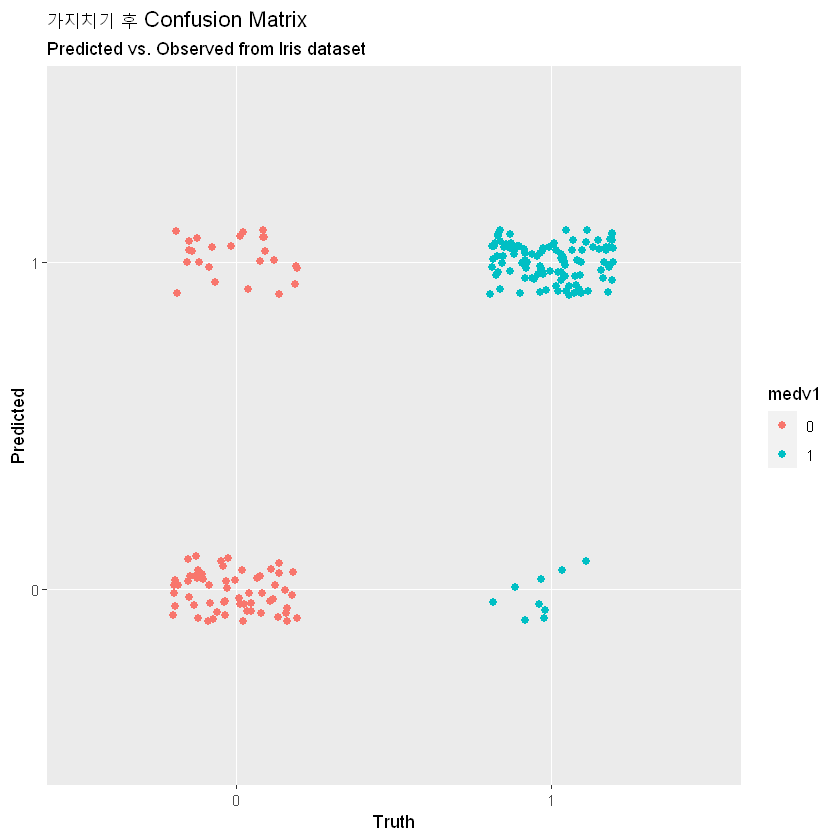

In [31]:
ggplot(test, aes(medv1, ppre, color = medv1)) +
   geom_jitter(width = 0.2, height = 0.1, size=2) +
     labs(title="가지치기 후 Confusion Matrix", 
                 subtitle="Predicted vs. Observed from Iris dataset", 
               y="Predicted", 
                x="Truth")

#### 가지치기 전 나무 모형과 가지치기 후 나무모형은 민감도와 특이도 측면에서 조금 차이가 있지만, 전체적으로 큰 차이는 없어보임. 다만 해석력의 측면에서는 가지치기 후 모델이 더 좋다.

## 서포트 벡터 머신

In [32]:
#패키지 부착
library(e1071)

In [33]:
#모델 적합
sv <- svm(medv1 ~., data = train, type = "C-classification",gamma=1 )
summary(sv)


Call:
svm(formula = medv1 ~ ., data = train, type = "C-classification", 
    gamma = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  246

 ( 152 94 )


Number of Classes:  2 

Levels: 
 0 1




In [34]:
# svm 모델로 medv1 예측
pre=predict(sv,test_x)
t=table(pre,test_y)

In [35]:
#민감도
t[2,2]/(t[2,1]+t[2,2])

[1] 0.8307692

In [36]:
#특이도
t[1,1]/(t[1,1]+t[1,2])

[1] 0.9117647

In [37]:
#정분류율
(t[1,1]+t[2,2])/(t[1,1]+t[1,2]+t[2,1]+t[2,2])

[1] 0.8585859

In [38]:
#최선의 tunning parameter 선택을 위한 cross-validation 실시
set.seed(1)
tune.out <- tune(svm, medv1 ~ ., data = train, 
                 ranges = list(
                   cost = c(0.1, 1, 10, 100, 1000),
                   gamma = c(0.5, 1, 2, 3, 4) ))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.1234409 

- Detailed performance results:
    cost gamma     error dispersion
1  1e-01   0.5 0.2952688 0.05480286
2  1e+00   0.5 0.1654839 0.06920524
3  1e+01   0.5 0.1234409 0.05916650
4  1e+02   0.5 0.1494624 0.06445437
5  1e+03   0.5 0.1494624 0.06445437
6  1e-01   1.0 0.3602151 0.06428873
7  1e+00   1.0 0.1847312 0.08220131
8  1e+01   1.0 0.1654839 0.06751389
9  1e+02   1.0 0.1653763 0.05975632
10 1e+03   1.0 0.1653763 0.05975632
11 1e-01   2.0 0.4054839 0.07916272
12 1e+00   2.0 0.2403226 0.05115601
13 1e+01   2.0 0.2079570 0.07417744
14 1e+02   2.0 0.2079570 0.07417744
15 1e+03   2.0 0.2079570 0.07417744
16 1e-01   3.0 0.4087097 0.07446654
17 1e+00   3.0 0.2794624 0.06777976
18 1e+01   3.0 0.2469892 0.06933803
19 1e+02   3.0 0.2469892 0.06933803
20 1e+03   3.0 0.2469892 0.06933803
21 1e-01   4.0 0.4087097 0.07446654
22 1e+00   4.0 0.2891398 

In [39]:
t=table( true = test_y,  pred = predict( tune.out$best.model, newdata = test_x ))
print(t)

    pred
true   0   1
   0  66  18
   1   9 105


In [40]:
#민감도
t[2,2]/(t[2,1]+t[2,2])

[1] 0.9210526

In [41]:
#특이도
t[1,1]/(t[1,1]+t[1,2])

[1] 0.7857143

In [42]:
#정분류율
(t[1,1]+t[2,2])/(t[1,1]+t[1,2]+t[2,1]+t[2,2])

[1] 0.8636364

### 부스팅

In [43]:
library(gbm)

Loaded gbm 2.1.8



In [44]:
boost<- gbm(medv1 ~ ., data = train,
    distribution = "bernoulli", n.trees = 5000 , #n.trees=B 
    interaction.depth = 4) # depth = d, shrinkage=0.001

Warning message in min(x):
"min에 전달되는 인자들 중 누락이 있어 Inf를 반환합니다"
Warning message in max(x):
"max에 전달되는 인자들 중 누락이 있어 -Inf를 반환합니다"


ERROR: Error in plot.window(xlim, ylim, log = log, ...): 유한한 값들만이 'xlim'에 사용될 수 있습니다


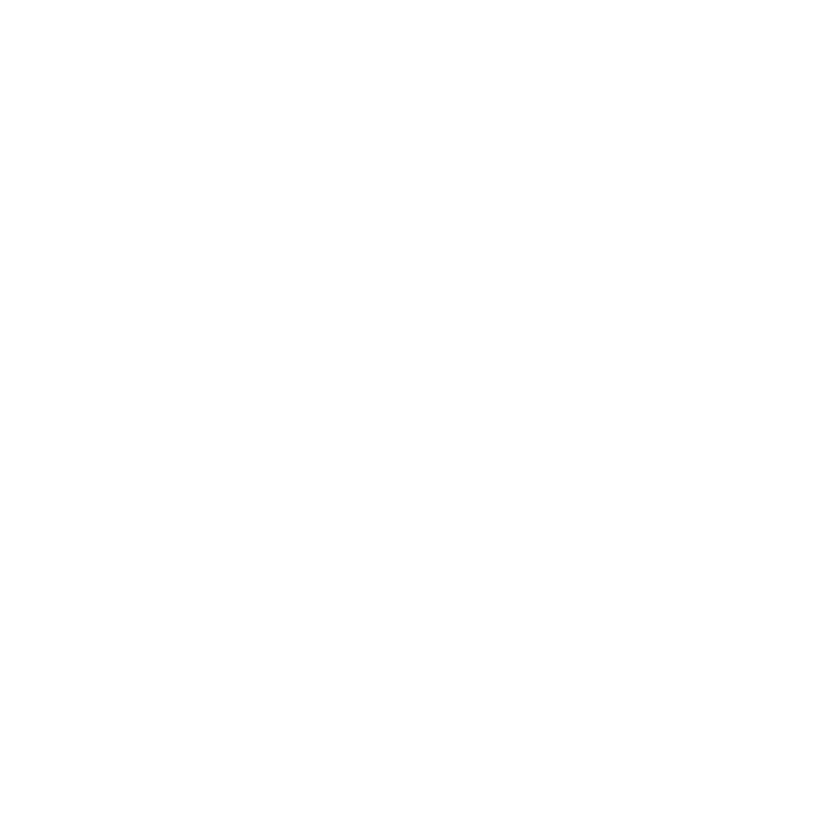

In [45]:
summary(boost) # distribution = "bernoulli" 로 주면 오류 발생

In [ ]:
boost <- gbm(medv1 ~ ., data = train,
    distribution = "gaussian", n.trees = 5000 , #n.trees=B 
    interaction.depth = 4) # depth = d, shrinkage=0.001
summary(boost)

#### rm 과 Istat 변수가 medv1에 대해 가장 높은 영향력을 가짐

In [ ]:
par(mfrow=c(1,2))
plot(boost.boston,i="rm") #rm이 커짐에 따라 증가
plot(boost.boston,i="lstat") #Istat에 따라 감소

In [ ]:
pre<-predict(boost,newdata=test_x,n.trees=5000)
head(pre) #연속형 변수로 나옴

In [265]:
r=range(pre) #구간별로 기준을 세워 원래 범주형 변수로 변환
print(r)

[1] 0.691191 2.345325


In [261]:
r[1]+((r[2]-r[1])/2) # 1.5를 기준

[1] 1.518258

In [262]:
# 부스팅 모델로 medv1 을 예측
pre=ifelse(pre<=1.5,0,1)
t=table(pre,test_y)
print(t)

   test_y
pre   0   1
  0  66   8
  1  18 106


In [255]:
#민감도
t[2,2]/(t[2,1]+t[2,2])

[1] 0.8548387

In [256]:
#특이도
t[1,1]/(t[1,1]+t[1,2])

[1] 0.8918919

In [257]:
#정분류율
(t[1,1]+t[2,2])/(t[1,1]+t[1,2]+t[2,1]+t[2,2])

[1] 0.8686869

#### 정분류율을 예측성능 척도로 봤을 때 가장 우수한 모델은 boosting 모델이었고, 민감도를 예측성능으로 봤을 때 가장 우수한 모델은 support vector machine이었다.